# Importar librerias

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from xgboost import XGBClassifier
import joblib

from importlib import reload
import utils  # Importa el módulo
reload(utils)  # Recarga el módulo

<module 'utils' from 'c:\\Users\\USUARIO\\OneDrive - Universidad de Antioquia\\Aprendizaje\\Universidad\\2023-2\\Analítica II\\Caso Estudio Supervisado\\pediccion_abandono_empleo\\utils.py'>

# Importar datos

In [15]:
df_anova = pd.read_csv('Datasets/seleccion_anova.csv')
df_manual = pd.read_csv('Datasets/seleccion_manual.csv')
df_total = pd.read_csv('Datasets/datos_preparados.csv')

#### Separar variable objetivo y hacer el split

In [16]:
X_anova = df_anova
y = df_total.target
X_manual= df_manual

X_train, X_test, y_train, y_test = utils.split(X_manual, y, test_size = 0.2)
X_train_a, X_test_a, y_train_a, y_test_a = utils.split(X_anova, y, test_size = 0.2)

X train shape:  (3520, 45)
y train shape:  (881, 45)
X test shape:  (3520,)
y test shape:  (881,)
X train shape:  (3520, 30)
y train shape:  (881, 30)
X test shape:  (3520,)
y test shape:  (881,)


# Importar modelos

In [17]:
# Cargar el modelo desde la carpeta Modelos
xgb_manual = joblib.load('Modelos/xgb_opt.pkl')
xgb_anova = joblib.load('Modelos/xgb_opt_anova.pkl')

# Xtreme Gradian Boosting Classifier con selección manual

------------------------------ MANUAL ------------------------------


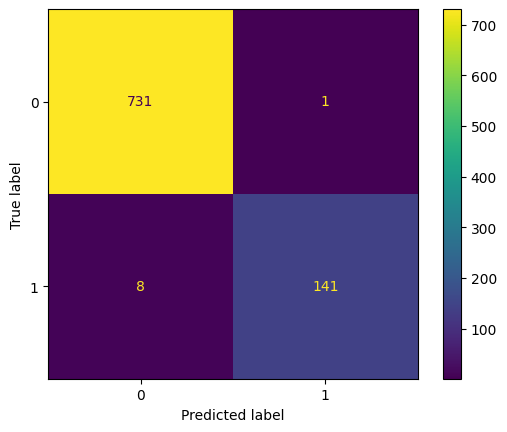

Precision: 0.9929577464788732
Recall: 0.9463087248322147
Especificidad: 0.9986338797814208
F1 score: 0.9690721649484537
Train score:  0.9897843359818388


In [5]:
precision, recall, especificidad, f1_score = utils.metricas(xgb_manual, X_test, y_test, 'MANUAL')

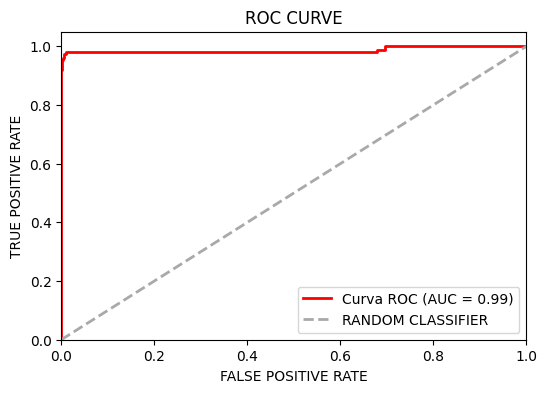

0.9858895368027286

In [6]:
utils.curvaROC(xgb_manual,X_test,y_test)

Importancia de las características

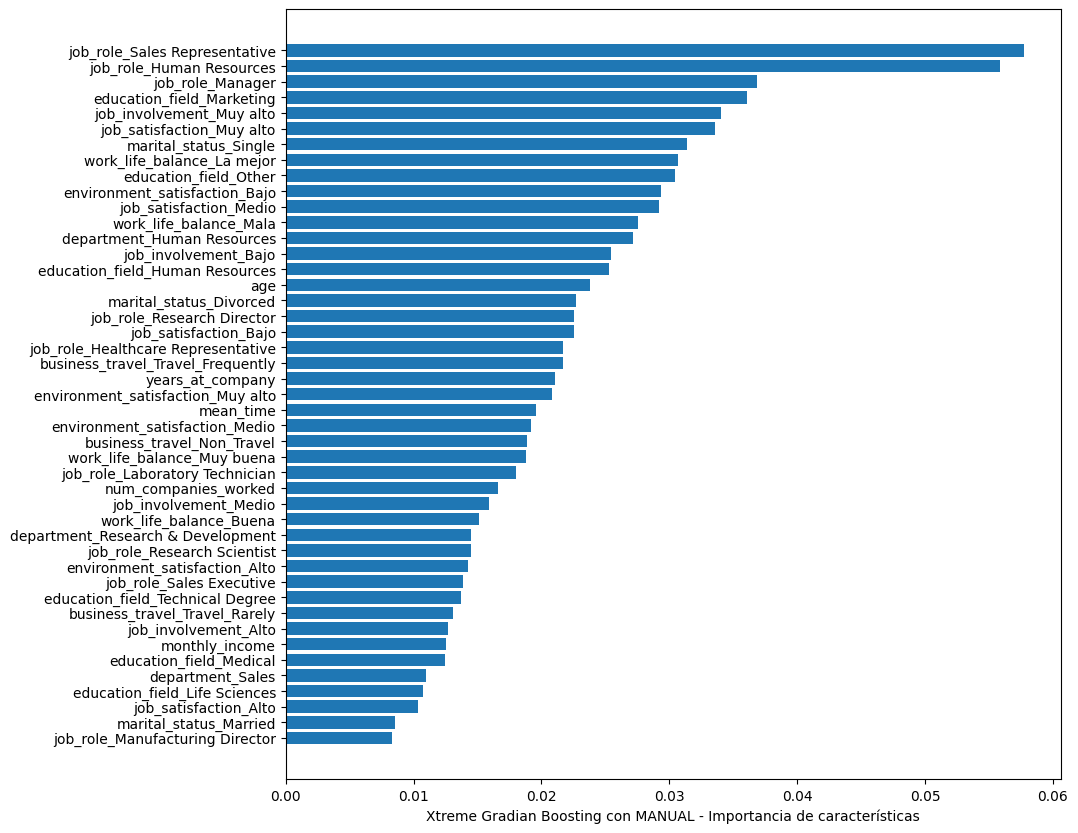

In [32]:
plt.figure(figsize=(10,10))
importance = xgb_manual.feature_importances_
sorted_idx = xgb_manual.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], importance[sorted_idx])
plt.xlabel("Xtreme Gradian Boosting con MANUAL - Importancia de características")
plt.show()

# Xtreme Gradian Boosting Classifier con Selección Anova

------------------------------ ANOVA ------------------------------


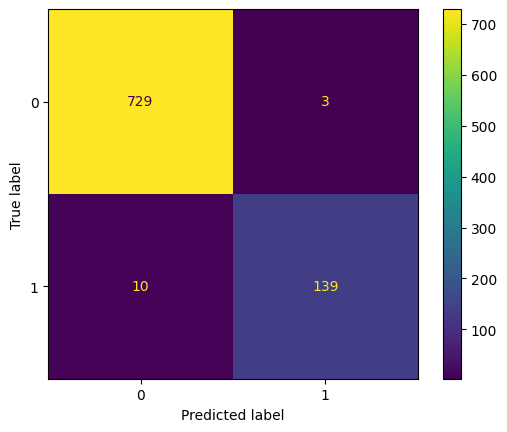

Precision: 0.9788732394366197
Recall: 0.9328859060402684
Especificidad: 0.9959016393442623
F1 score: 0.9553264604810996
Train score:  0.985244040862656


In [7]:
precision, recall, especificidad, f1_score = utils.metricas(xgb_anova, X_test_a, y_test_a, 'ANOVA')

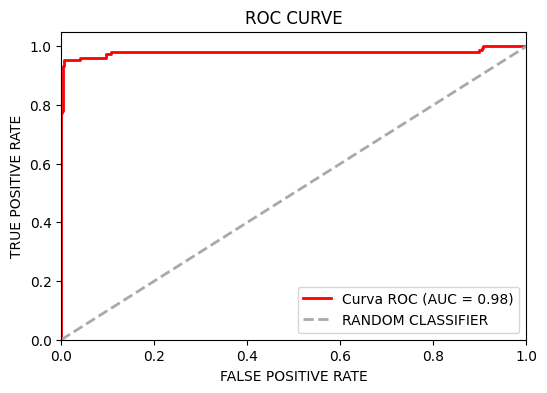

0.9789214068287673

In [8]:
utils.curvaROC(xgb_anova,X_test_a,y_test_a)

**Importancia de características**

Text(0.5, 0, 'Xtreme Gradian Boosting con ANOVA - Importancia de características')

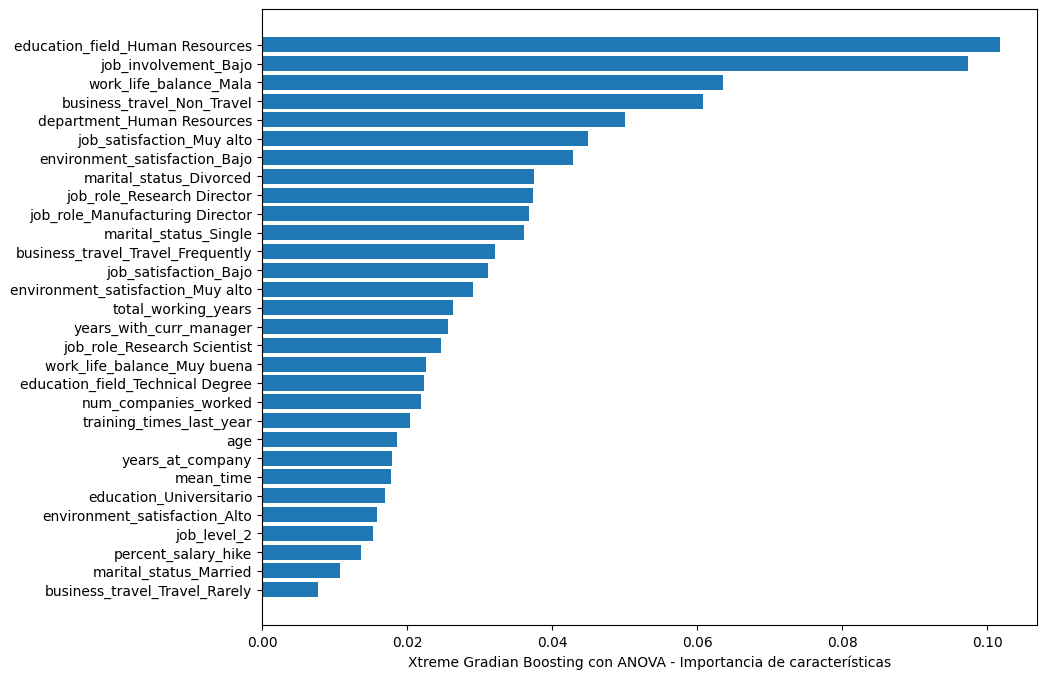

In [33]:
plt.figure(figsize=(10,8))
importance = xgb_anova.feature_importances_
sorted_idx = xgb_anova.feature_importances_.argsort()
plt.barh(X_train_a.columns[sorted_idx], importance[sorted_idx])
plt.xlabel("Xtreme Gradian Boosting con ANOVA - Importancia de características")

# Conclusión

- Al tener modelos perfectos en entrenamiento, ambos modelos presentan sobreajuste, pero en este caso no tiene efectos negativos, dado que en las pruebas los modelos siguen arrojando muy buenos resultados en las métricas de desempeño.

- Se selecciona el modelo Xtreme Gradian Boosting con la selección obtenida con el método ANOVA. Aunque el modelo Xtreme Gradian Boosting con la selección manual presenta métricas un poco mejores, la diferencia es muy poca teniendo en cuenta la complejidad de ambos modelos, el modelo con la selección manual fue ajustado con 45 características, mientras que el modelo seleccionado fue ajustado con 30 características.

- La característica más importante para el modelo seleccionado (Xtreme Gradian Boosting Classifier con ANOVA) es la educación en el campo de Recursos Humanos. Para combatir el problema de abandono de empleados, poner especial atención en los que su hámbito de educación es en Recursos Humanos.

- El modelo indica que los empleados calificados con una baja implicación en el trabajo y los empleados que dieron una calificación de "Mala" al balance vida-trabajo también tienen mucho peso cuando se quiere predecir si un empleado va a abondonar.